In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics


In [2]:
rain=pd.read_csv('data/rain_data_aus.csv')

In [3]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [4]:
rain=rain.dropna()

In [5]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,No,No
5940,No,No
5942,No,No
5943,No,No
5944,No,No
...,...,...
139108,No,No
139109,No,No
139110,No,No
139111,No,No


In [6]:
rain['raintomorrow']=rain['raintomorrow'].replace({'No':0,'Yes':1})
rain['raintoday']=rain['raintoday'].replace({'No':0,'Yes':1})

In [7]:
rain[['raintomorrow','raintoday']]

,raintomorrow,raintoday
5939,0,0
5940,0,0
5942,0,0
5943,0,0
5944,0,0
...,...,...
139108,0,0
139109,0,0
139110,0,0
139111,0,0


In [8]:
rain.corr()['raintomorrow']

mintemp             0.088964
maxtemp            -0.144498
rainfall            0.253773
evaporation        -0.127257
sunshine           -0.449261
humidity9am         0.265360
humidity3pm         0.447742
pressure9am        -0.255934
pressure3pm        -0.231428
cloud9am            0.319410
cloud3pm            0.389891
temp9am            -0.016180
temp3pm            -0.181295
raintoday           0.308621
amountOfRain        0.492611
raintomorrow        1.000000
temp               -0.112636
humidity            0.406002
precipitation3pm    0.006578
precipitation9am   -0.013366
modelo_vigente      0.863107
Name: raintomorrow, dtype: float64

In [9]:
#amountOfRain -> maior correlação

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
#Tentativa 1
#X=rain[['amountOfRain']]
#y=rain['raintomorrow']

In [12]:
#Tentativa  2
#X=rain[['sunshine']]
#y=rain['raintomorrow']

In [15]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [14]:
#Tentativa  3
X=rain[[ 'mintemp', 'maxtemp', 'rainfall','evaporation','sunshine',
        'humidity9am', 'humidity3pm','pressure9am', 'pressure3pm',
        'cloud9am', 'cloud3pm', 'temp9am','temp3pm', 'raintoday',
        'temp','humidity', 'precipitation3pm','precipitation9am']]
y=rain['raintomorrow']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
tree=DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [18]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
tree.score(X_test,y_test)

0.7810077519379846

In [20]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

confusion_matrix(y_test, tree.predict(X_test))

array([[8232, 1425],
       [1287, 1440]], dtype=int64)

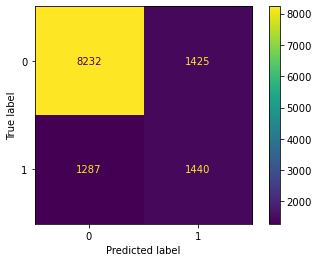

In [21]:
plot_confusion_matrix(tree, X_test, y_test, values_format='.0f')
plt.grid(False)

In [35]:
tree=DecisionTreeClassifier(max_depth=9)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
confusion_matrix(y_test, tree.predict(X_test))

array([[8977,  680],
       [1326, 1401]], dtype=int64)

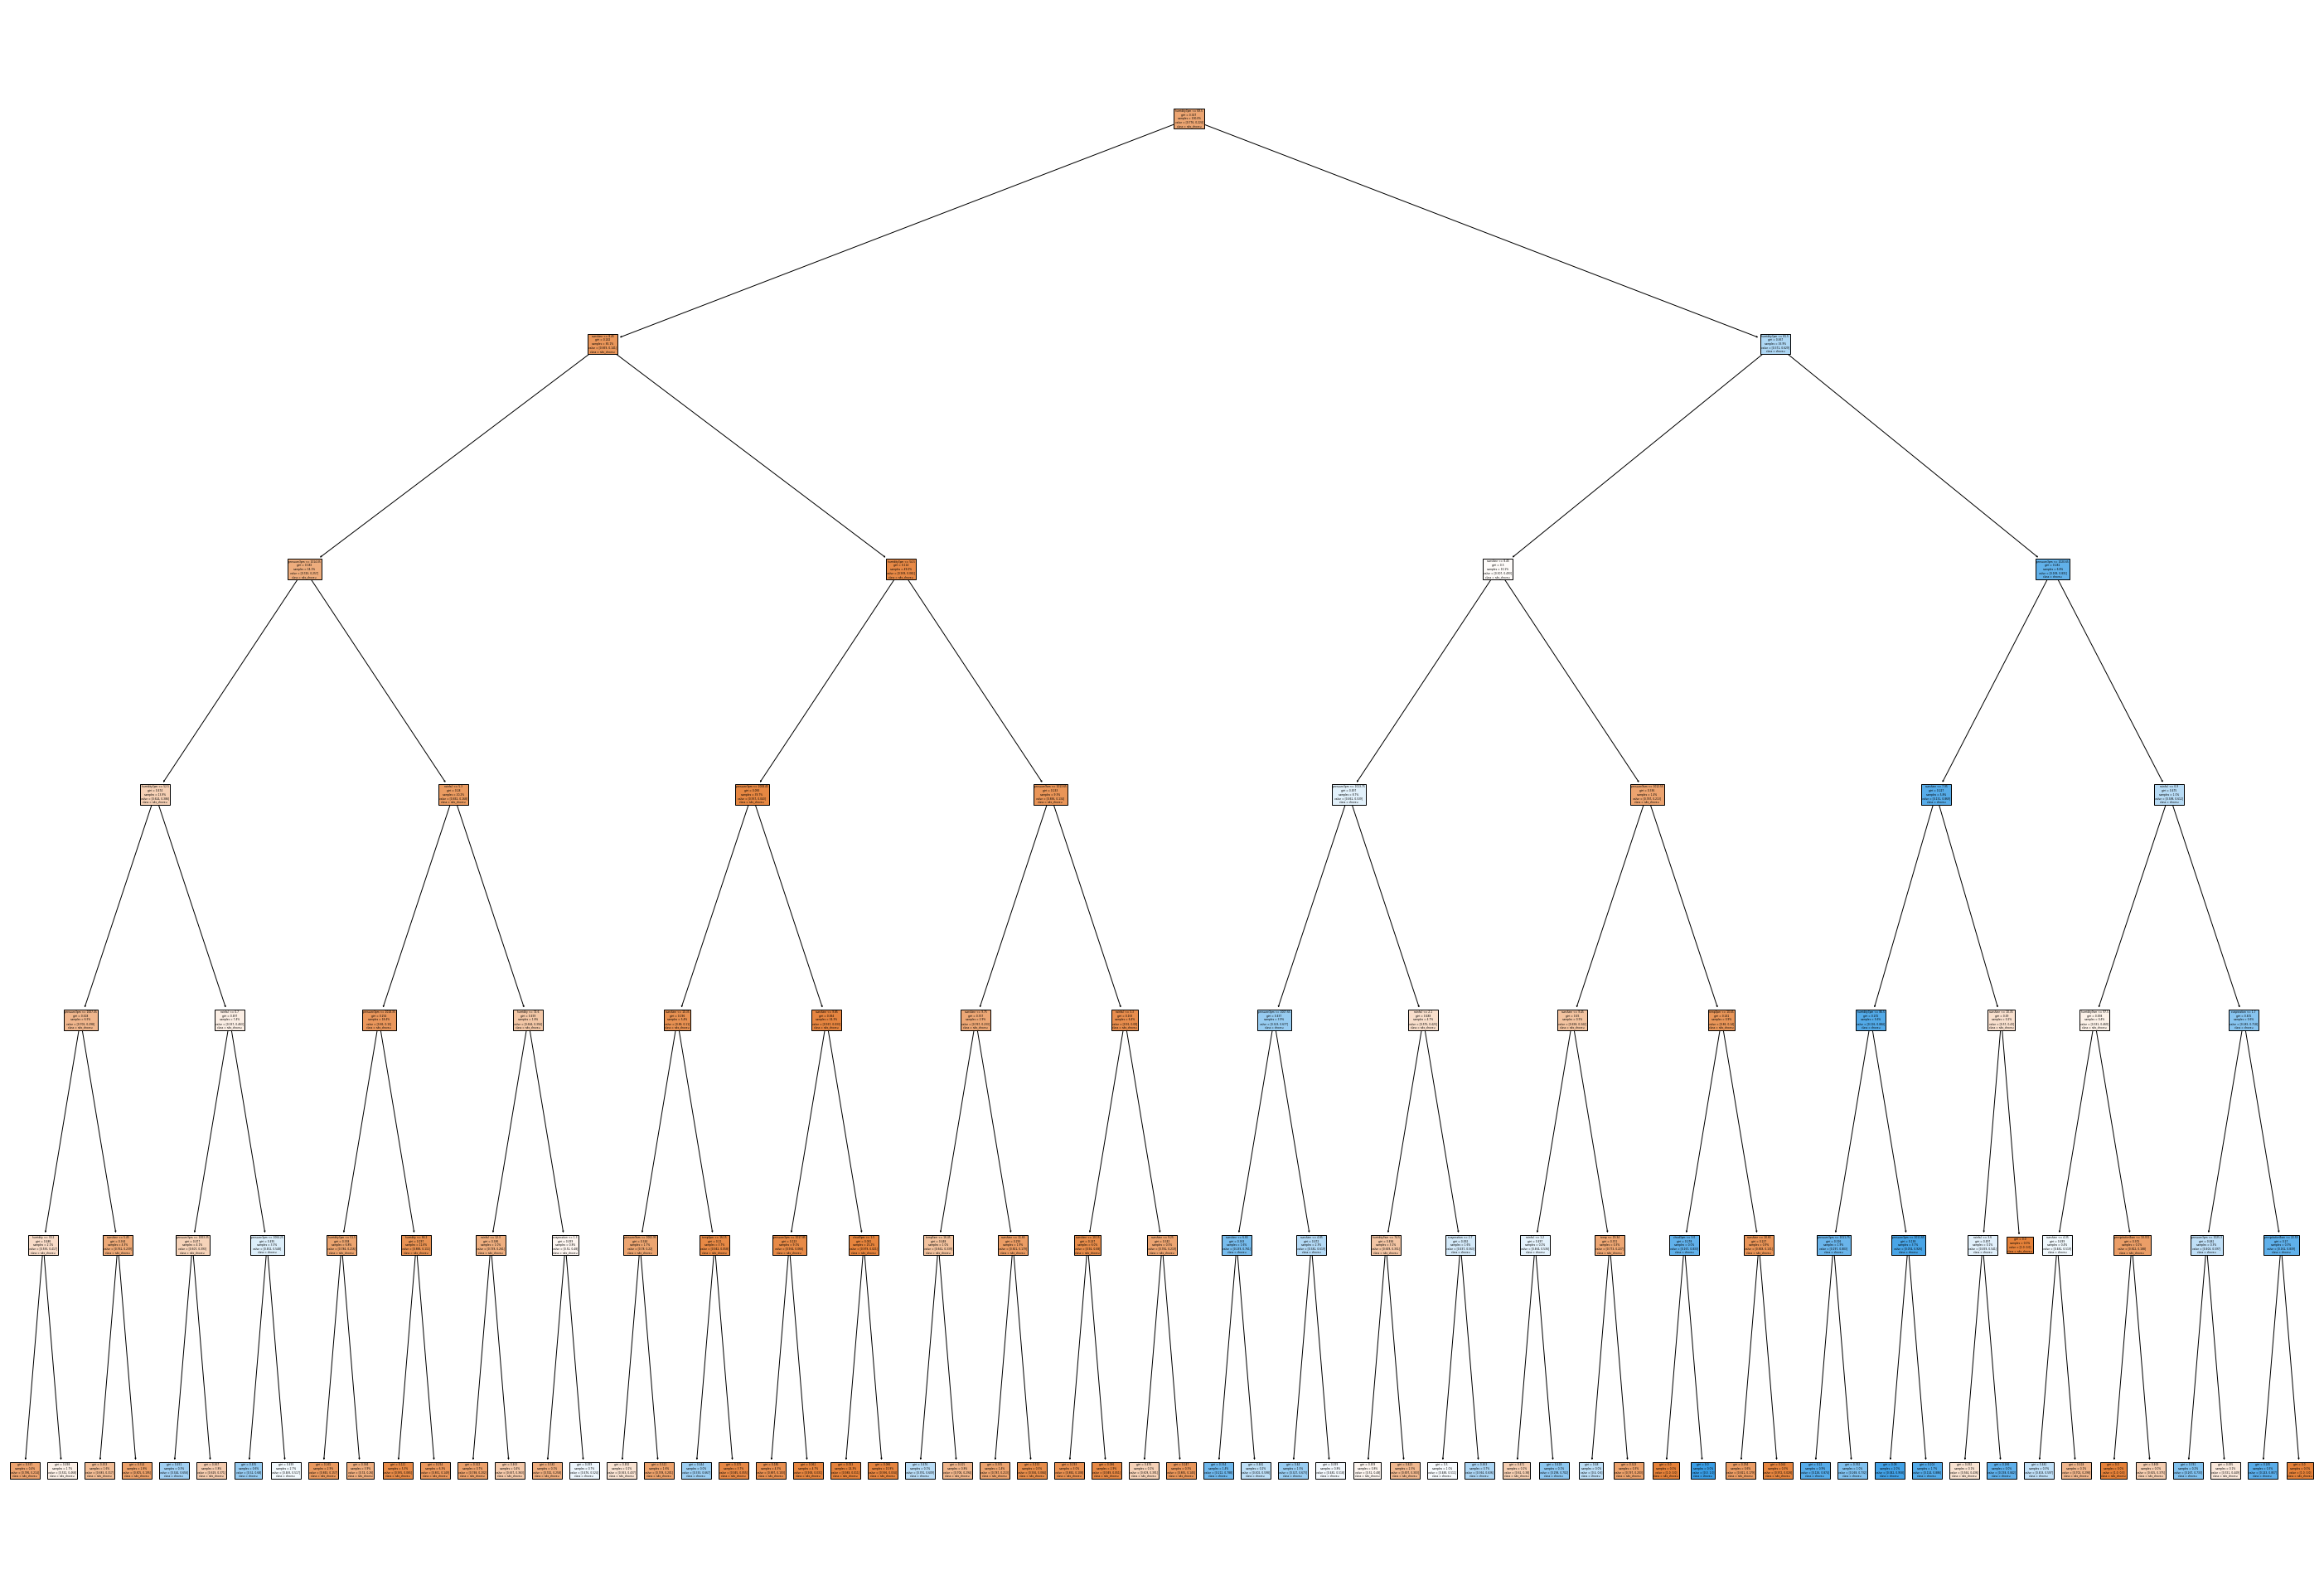

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["não_choveu","choveu"],proportion=True,filled=True)
plt.show()

  0%|          | 0/19 [00:00<?, ?it/s]

9

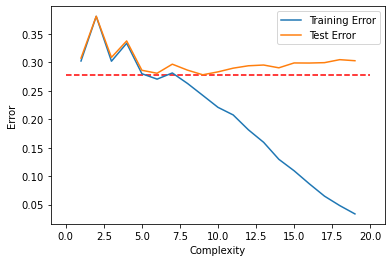

In [34]:
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
complexity = []
error_test = []
error_train = []
for K in tqdm(range(1, 20)):
    complexity.append(K)
    knn = DecisionTreeClassifier(max_depth=K)
    knn.fit(X_train, y_train)
    error_train.append(1 - roc_auc_score(y_train, knn.predict(X_train)))
    error_test.append(1 - roc_auc_score(y_test, knn.predict(X_test)))
plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 20, colors='red', linestyles='dashed')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
error_test.index(min(error_test))+1

In [40]:
pd.DataFrame(tree.feature_importances_,X_train.columns)

,0
mintemp,0.013381
maxtemp,0.006953
rainfall,0.036790
evaporation,0.011991
sunshine,0.156747
humidity9am,0.014817
humidity3pm,0.544551
pressure9am,0.018913
pressure3pm,0.125678
cloud9am,0.004111
